## Use Case : Analyzing the relationship between soil fertility and crop yield using cointegration analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate Synthetic Agricultural Data

In [2]:
# Generate synthetic data for soil fertility and crop yield for 100,000 data points
np.random.seed(42)
data_size = 100000

# Simulate soil fertility (e.g., based on weather and soil health)
soil_fertility = np.random.normal(0, 1, data_size).cumsum()

# Simulate crop yield (e.g., based on soil fertility, climate factors)
crop_yield = 0.5 * soil_fertility + np.random.normal(0, 1, data_size).cumsum()

# Create DataFrame
data = pd.DataFrame({'soil_fertility': soil_fertility, 'crop_yield': crop_yield})

# Check the first few rows
data.head()


,soil_fertility,crop_yield
0,0.496714,1.278952
1,0.358450,0.054465
2,1.006138,0.953746
3,2.529168,1.096023
4,2.295015,0.651543


# Preprocessing the Data

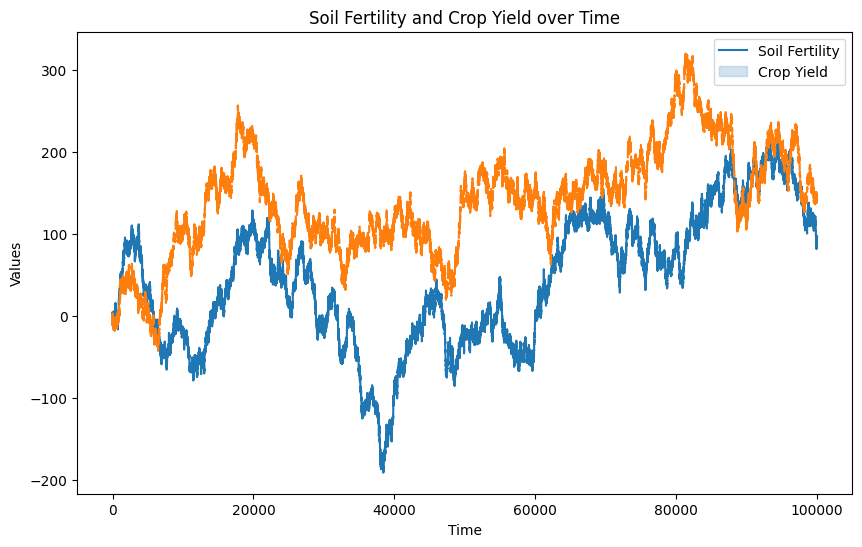

In [3]:
# Handle missing values (if any)
data = data.dropna()

# Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=data)
plt.title('Soil Fertility and Crop Yield over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Soil Fertility', 'Crop Yield'])
plt.show()


# Cointegration Testing (Engle-Granger Test)

In [4]:
# Perform the Engle-Granger Cointegration Test
score, p_value, _ = coint(data['soil_fertility'], data['crop_yield'])

# Display results
print(f"Cointegration Test Score: {score}")
print(f"P-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("The series are cointegrated (long-term relationship exists).")
else:
    print("The series are not cointegrated.")


Cointegration Test Score: -2.1846325580097004
P-value: 0.4323017595684311
The series are not cointegrated.


# Johansen Cointegration Test (for Multiple Variables)

In [5]:
# Perform Johansen Cointegration Test
jres = coint_johansen(data, det_order=0, k_ar_diff=1)

# Display the results
print(f"Eigenvalues:\n{jres.eig}")
print(f"Trace Statistic:\n{jres.lr1}")
print(f"Critical Values:\n{jres.cvt}")

# Interpretation based on Trace Statistic
for i in range(len(jres.lr1)):
    if jres.lr1[i] > jres.cvt[i, 1]:  # 5% critical value
        print(f"Cointegration exists for rank {i+1}")
    else:
        print(f"No cointegration for rank {i+1}")


Eigenvalues:
[1.48323500e-04 5.35668964e-05]
Trace Statistic:
[20.18987945  5.35672598]
Critical Values:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Cointegration exists for rank 1
Cointegration exists for rank 2


# Time Series Plot

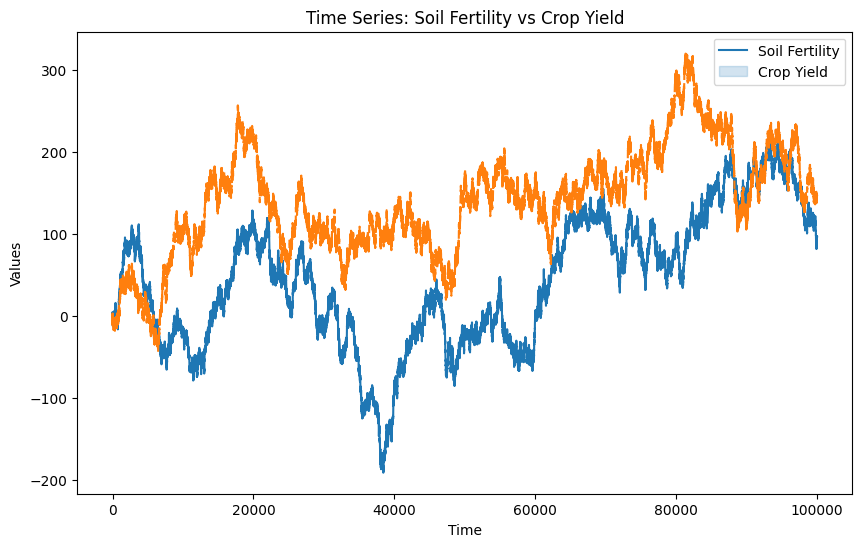

In [6]:
# Plot the time series for soil fertility and crop yield
plt.figure(figsize=(10, 6))
sns.lineplot(data=data)
plt.title('Time Series: Soil Fertility vs Crop Yield')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Soil Fertility', 'Crop Yield'])
plt.show()


# ACF and PACF Plots

<Figure size 1000x600 with 0 Axes>

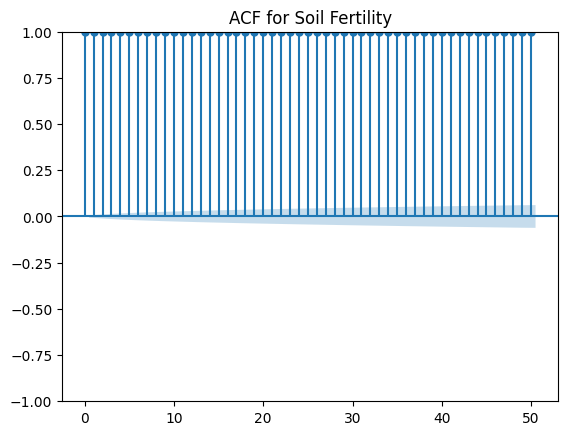

<Figure size 1000x600 with 0 Axes>

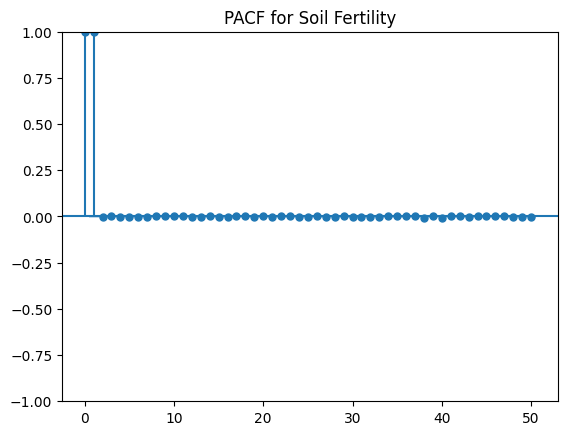

<Figure size 1000x600 with 0 Axes>

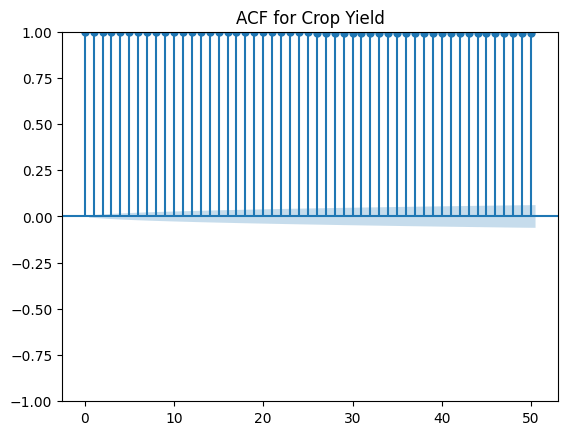

<Figure size 1000x600 with 0 Axes>

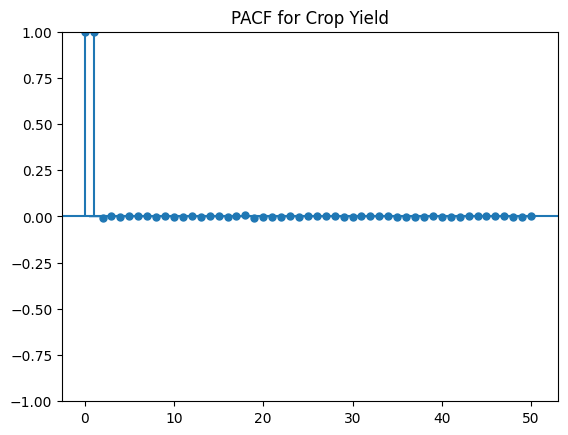

In [7]:
# ACF and PACF for Soil Fertility
plt.figure(figsize=(10, 6))
plot_acf(data['soil_fertility'], lags=50)
plt.title('ACF for Soil Fertility')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data['soil_fertility'], lags=50)
plt.title('PACF for Soil Fertility')
plt.show()

# ACF and PACF for Crop Yield
plt.figure(figsize=(10, 6))
plot_acf(data['crop_yield'], lags=50)
plt.title('ACF for Crop Yield')
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(data['crop_yield'], lags=50)
plt.title('PACF for Crop Yield')
plt.show()


# Cointegrated Series

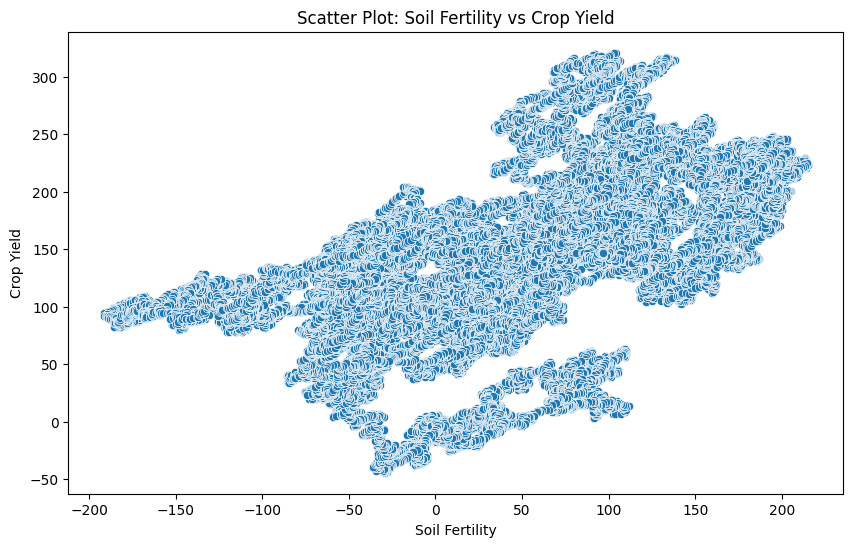

In [8]:
# Scatter plot of Soil Fertility vs Crop Yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['soil_fertility'], y=data['crop_yield'])
plt.title('Scatter Plot: Soil Fertility vs Crop Yield')
plt.xlabel('Soil Fertility')
plt.ylabel('Crop Yield')
plt.show()

# Cumulative Sum Plot

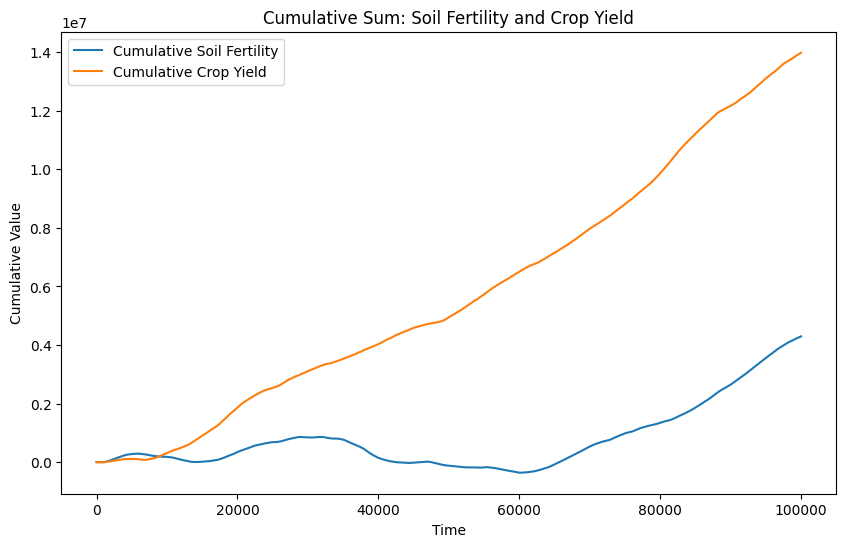

In [9]:
# Plot the cumulative sum of soil fertility and crop yield
plt.figure(figsize=(10, 6))
plt.plot(data['soil_fertility'].cumsum(), label='Cumulative Soil Fertility')
plt.plot(data['crop_yield'].cumsum(), label='Cumulative Crop Yield')
plt.title('Cumulative Sum: Soil Fertility and Crop Yield')
plt.xlabel('Time')
plt.ylabel('Cumulative Value')
plt.legend()
plt.show()

### Model Interpretation

- **Cointegration Test**:  
  If the p-value from the Engle-Granger test is <0.05, it indicates a long-term relationship between soil fertility and crop yield.  

- **Johansen Test**:  
  If the trace statistic exceeds the critical value, cointegration is confirmed between the variables.  

- **Visualizations**:  
  - The **time series plot** shows the trends of soil fertility and crop yield over time.  
  - The **scatter plot** reveals the relationship between the variables; a linear pattern indicates a strong connection.  
  - The **cumulative sum plot** highlights long-term trends in the variables.

### Conclusion  
Significant results (p-value < 0.05 or trace statistic > critical value) suggest a long-term relationship between soil fertility and crop yield, supported by visualizations.

### Real-World Application  
This analysis can be applied to real agricultural data to help farmers, scientists and policymakers understand how factors like soil fertility impact crop production.